# Example: Emulate global mean air temperature

The purpose of this tutorial is to demonstrate how `stitches` can be used to
emulate global mean temperature.

To use `stitches` there are a number of user decisions that have to be made,
perhaps the two most important being the target and archive data.

* target data: the temperature time series that is to be emulated
* archive data: the values to be used in matching process,
it should only include entries for the specific ESM to be emulating

### Getting Started

Start by loading the stitches package (see [installation instructions]()
if `stitches` must be installed).

In [61]:
import stitches as stitches

Load the additional python libraries that will be used in this example.

In [62]:
import pandas as pd
import pkg_resources

# For help with plotting
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6



### Example Set Up

**Decide on the target data.** Since the objective of this example is to illustrate
how `stitches` can be used in emulation. Let's use SSP245 results from CanESM5, that
way we can compare the final stitched products with the actual model results.

In [ ]:
path = pkg_resources.resource_filename('stitches', 'data/matching_archive.csv')
data = pd.read_csv(path)

In [ ]:
target_data = data[data["model"] == "CanESM5"].copy()
target_data = target_data[target_data["experiment"] == 'ssp245']
target_data = target_data[target_data["ensemble"].isin(['r1i1p1f1'])]
target_data = target_data.reset_index(drop=True)

**Decide on the archive data.** Since we are interested in emulating CanESM5 for a run
that we have comparison data, we construct the archive so that it does not contain the
results we are interested in emulating.

In [ ]:
archive_data = data[data["model"] == "CanESM5"]
archive_data = archive_data[archive_data["experiment"].isin(['ssp126', 'ssp585'])]

Use the target_data and archive_data to make the recipes using the function
`make_recipe`.

In [14]:
my_recipes = stitches.make_recipe(target_data, archive_data, N_matches = 4)


You have requested more recipes than possible for at least one target trajectories, returning what can


Now use the recipe to get the global mean air temperature using `gmat_stitching`.
The data frame returned by `gmat_stitching` will contain the stitched product.

In [19]:
stitched_global_temp = stitches.gmat_stitching(my_recipes)

/Users/dorh012/Documents/2021/cleanup_stitch/stitches/venv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,year,value,variable,stitching_id
0,1850,-1.412085,tas,ssp245~r1i1p1f1~1
1,1851,-1.186196,tas,ssp245~r1i1p1f1~1
2,1852,-1.224417,tas,ssp245~r1i1p1f1~1
3,1853,-1.197321,tas,ssp245~r1i1p1f1~1
4,1854,-1.309106,tas,ssp245~r1i1p1f1~1
...,...,...,...,...
999,2096,2.753571,tas,ssp245~r1i1p1f1~4
1000,2097,2.950678,tas,ssp245~r1i1p1f1~4
1001,2098,2.784729,tas,ssp245~r1i1p1f1~4
1002,2099,2.822979,tas,ssp245~r1i1p1f1~4


In [ ]:
stitched_global_temp.head()



### Visualize Results

Plot the stitched outputs.

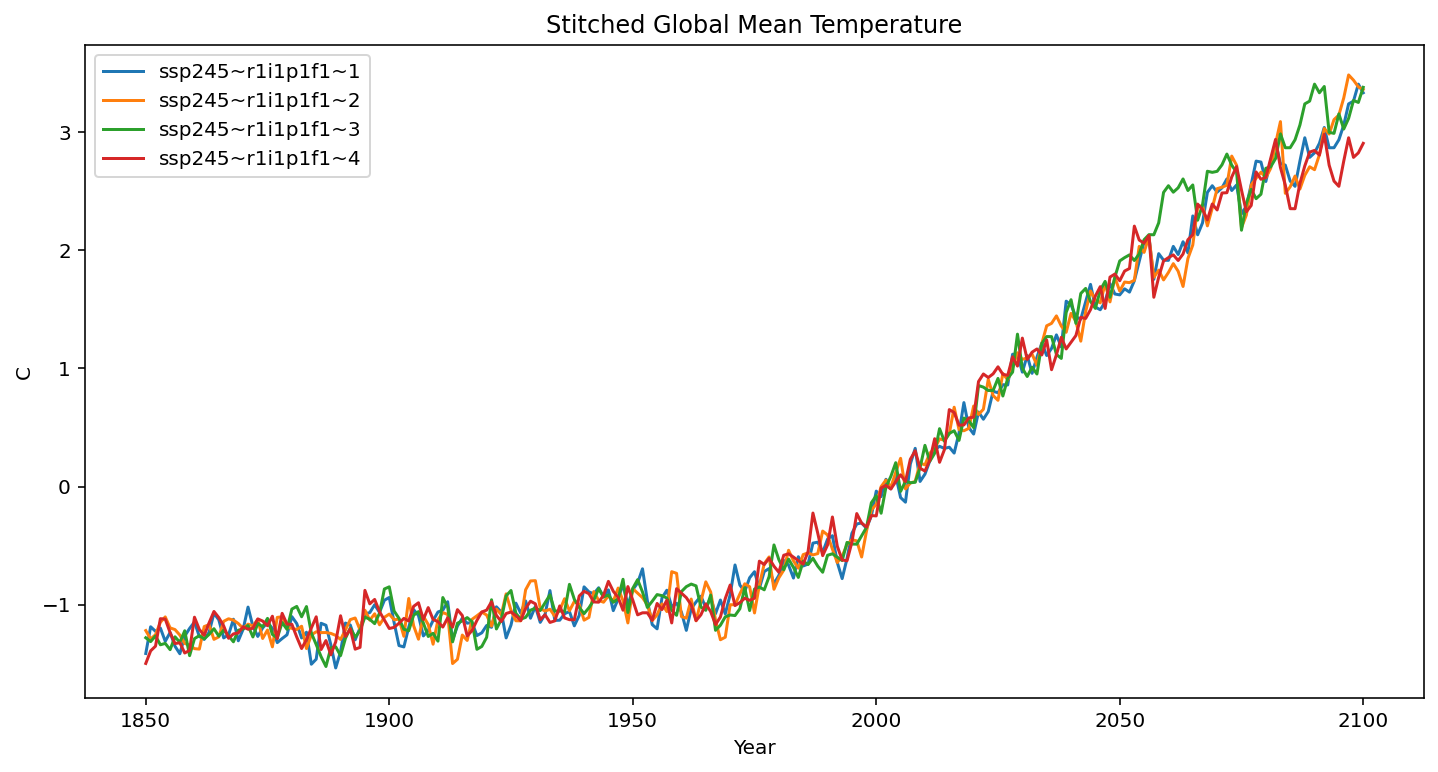

In [41]:
groups = stitched_global_temp.groupby('stitching_id')
for name, group in groups:
    plt.plot(group.year, group.value, label = name)
plt.xlabel("Year")
plt.ylabel("C")
plt.title("Stitched Global Mean Temperature")
plt.legend()



Now compare the stitched products with the actual comparison data.

In [43]:
# Load the data
data_path = pkg_resources.resource_filename('stitches', 'data/tas-data/CanESM5_tas.csv')
comp_data = pd.read_csv(data_path)
comp_data = comp_data[comp_data["experiment"] == "ssp245"]

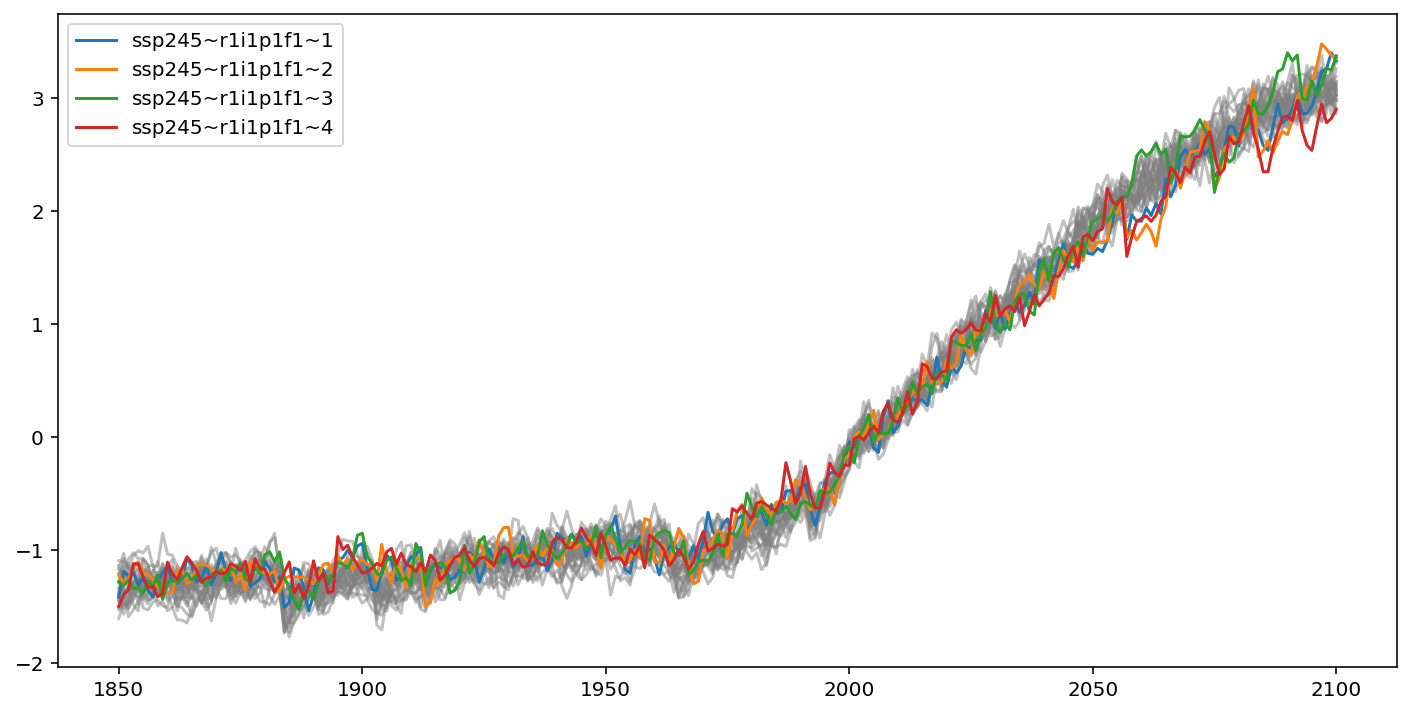

In [60]:
# Plot results
groups = comp_data.groupby('ensemble')
for name, group in groups:
    plt.plot(group.year, group.value, color = "0.5", alpha=0.5)

groups = stitched_global_temp.groupby('stitching_id')
for name, group in groups:
    plt.plot(group.year, group.value, label = name)
plt.legend()
plt.xlabel("Year")
plt.ylabel("C")
plt.title("Stitched Global Mean Temperature vs CanESM5 Results")
plt.show()